In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
import os
import time

In [54]:
def read_data():
    # read in input
    X = np.genfromtxt('../data/x_adv.csv', dtype=int, delimiter=',', names=None)
    y = np.genfromtxt('../data/y.csv', dtype=int, delimiter=',', names=None)
    return X, y

LinearRegression score -0.36468728886918655
MSE for LinearRegression: 73858.7026
DummyRegressor score -0.0024112867109453706
MSE for DummyRegressor: 54251.8405
Diff: 19606.8621, Ratio: 1.3614


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2324458.284494601, tolerance: 4456.588262
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1850492.520278778, tolerance: 4334.933662
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2201622.98124893, tolerance: 4476.774158
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235546.66362072

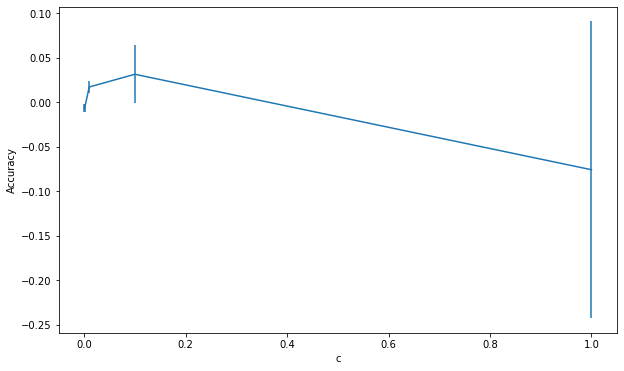

Time elapsed: 0.6348721981048584


In [62]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

start = time.time()

X, y = read_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'LinearRegression score {model.score(X_test,y_test)}')
er1 = mean_squared_error(y_test, y_pred)
print("MSE for LinearRegression: %.4f" % (er1))

baseline = DummyRegressor()
baseline.fit(X_train, y_train)
ydummy = baseline.predict(X_test)
print(f'DummyRegressor score {baseline.score(X_test, y_test)}')
er2 = mean_squared_error(y_test, ydummy)
print("MSE for DummyRegressor: %.4f" % (er2))

print("Diff: %.4f, Ratio: %.4f" % (er1-er2, er1/er2))

C = [0.0001, 0.001, 0.01, 0.1, 1]
accuracy = []
std = []

for c in C:
    model = linear_model.Lasso(alpha = 1/(2*c))
    scores = cross_val_score(model, X, y, cv=5)
    accuracy.append(scores.mean())
    std.append(scores.std())
    
plt.errorbar(C, accuracy, yerr=std)
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.gcf().set_size_inches(10, 6)
plt.show()

end = time.time()
print(f'Time elapsed: {end - start}')